<a href="https://colab.research.google.com/github/ananya-y9/Regression/blob/main/ols_ridge_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
from numpy.linalg import inv
import matplotlib.pyplot as plt

OLS Regression Model

In [3]:
train_x=np.load("train.npz")["x"]# 25 data points
train_y=np.load("train.npz")["y"]

test_x=np.load("test.npz")["x"]
test_y=np.load("test.npz")["y"]

train_x_100=np.load("train_100.npz")["x"]#100 data points
train_y_100=np.load("train_100.npz")["y"]

In [11]:
train_x

array([0.55840877, 0.50689343, 0.31296633, 0.87833236, 0.66856029,
       0.88179704, 0.77077247, 0.15548733, 0.50901782, 0.15173107,
       0.22751036, 0.05330876, 0.40557155, 0.26137474, 0.74087079,
       0.20005492, 0.14241613, 0.26852539, 0.80156393, 0.04320149,
       0.33846296, 0.75192539, 0.55178348, 0.95310169, 0.08105718])

In [ ]:
def mse(f_map, y):
    #no ridge
    return np.linalg.inv(f_map.T @ f_map) @ f_map.T @ y

def error(pred, real):
    return np.mean((pred - real) ** 2)

#make polynomial features
poly_x = np.vstack([train_x**i for i in range(10)]).T

#implement k-fold from scratch
f_s = poly_x.shape[0] // 5
errors = []

for i in range(5):
    v_b = i * f_s
    v_e = (i + 1) * f_s
    x_v = poly_x[v_b:v_e]
    y_v = train_y[v_b:v_e]

    t_x = np.concatenate((poly_x[:v_b], poly_x[v_e:]), axis=0)
    t_y = np.concatenate((train_y[:v_b], train_y[v_e:]), axis=0)
    #new training set based on splits

    w = mse(t_x, t_y) #weights for each subset of training

    pred = x_v @ w #generate a prediction
    e = error(pred, y_v)#MSE error estimation for polynomials
    errors.append(e)
    #error

print(f"Avg validation error over 5 folds: {np.mean(errors)}")

Avg validation error over 5 folds: 0.6870122487454815


Ridge Regression Model (Add regularization)
Goal: Find the best lamdba

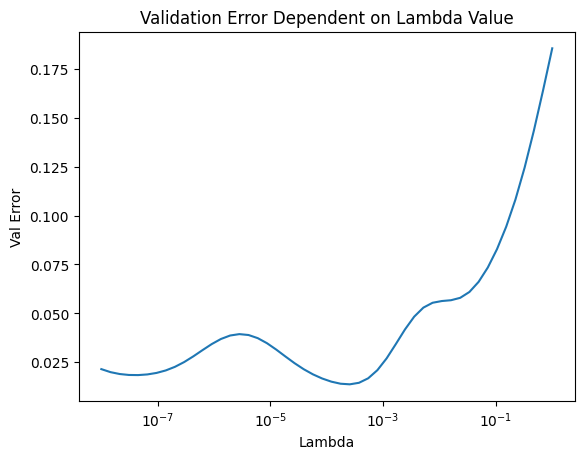

Best lambda: 0.00025595479226995333


In [7]:
def ridge(f_map, y, l):
    I = np.eye(f_map.shape[1])
    return np.linalg.inv(f_map.T @ f_map + l * I) @ f_map.T @ y

def mse(real, pred):
    return np.mean((real - pred) ** 2)

def c_v(X, y, lambdas):
    f_s = len(X) // 5
    errors = np.zeros(len(lambdas))

    for fold in range(5):
        start_val = fold * f_s
        end_val = start_val + f_s if fold != 5 - 1 else len(X)

        X_val_fold = X[start_val:end_val]
        y_val_fold = y[start_val:end_val]

        X_train_fold = np.concatenate((X[:start_val], X[end_val:]), axis=0)
        y_train_fold = np.concatenate((y[:start_val], y[end_val:]), axis=0)

        for i, lambda_val in enumerate(lambdas):
            w = ridge(X_train_fold, y_train_fold, lambda_val)
            y_val_pred = X_val_fold @ w
            errors[i] += mse(y_val_fold, y_val_pred)

        avg_error = errors/5
        #average error over 5 folds

    return avg_error

train_x_poly = np.column_stack([train_x ** i for i in range(10)]) #polynomial degree 9

# lambdas: 1e-8 -> 1
l = np.logspace(-8, 0, num=50)
#spacing up to design, chose 50 but also tested with 100

v_err = c_v(train_x_poly, train_y, l)

plt.plot(l, v_err)
plt.xscale('log')
#since we decided the lambdas were going to be of this scale

plt.xlabel('Lambda')
plt.ylabel('Val Error')
plt.title('Validation Error Dependent on Lambda Value')
plt.show()

b_l = l[np.argmin(v_err)] #find minimum -> best lambda is the one that minimizes the validation error
print(f"Best lambda: {b_l}")

In [8]:
w_optimal = ridge(train_x_poly, train_y, b_l)
np.save('w_best.npy', w_optimal)

w_o = ridge(train_x_poly, train_y, 0)
np.save('w_mmse.npy', w_o)

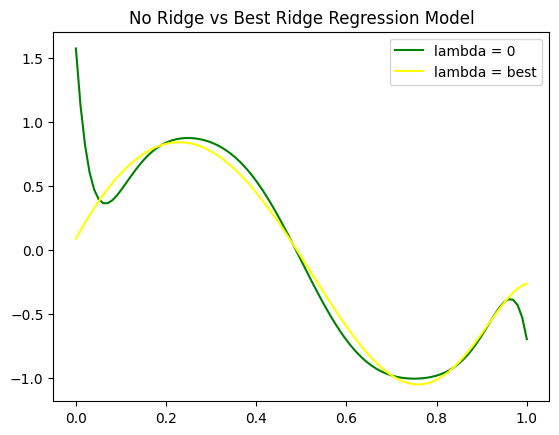

MSE for λ = 0: 0.05817688194819521
MSE for λ*: 0.0332857947031591


In [9]:
train_x_p = np.column_stack([train_x ** i for i in range(10)])

w = ridge(train_x_p, train_y, 0) #normal no ridge, so lambda is 0
w_r = ridge(train_x_p, train_y, b_l) #lambda chosen from previous cross validation

plot_x = np.linspace(0, 1, 100) #want models within 0 and 1
plot_x_p = np.column_stack([plot_x ** i for i in range(10)])
y_pred = plot_x_p @ w
y_pred_r = plot_x_p @ w_r


plt.plot(plot_x, y_pred, label=r'lambda = 0', color='green')
plt.plot(plot_x, y_pred_r, label=r'lambda = best', color='yellow')
plt.title('No Ridge vs Best Ridge Regression Model')
plt.legend()
plt.show()

#MSE Calculations

#Case 1 for original
test_x_poly = np.column_stack([test_x ** i for i in range(10)])
test_pred = test_x_poly @ w
error = mse(test_y, test_pred)
print(f'MSE for λ = 0: {error}')

#Case 2 for ridge
test_r_pred = test_x_poly @ w_r
ridge_error = mse(test_y, test_r_pred)
print(f'MSE for λ*: {ridge_error}')

In [ ]:
#Largest OLS

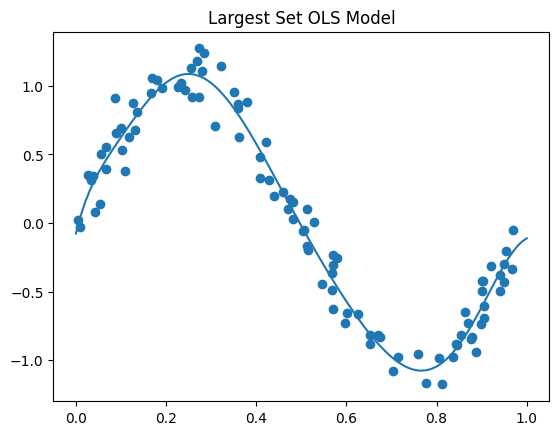

In [10]:
def normal_eq(f_map, y):
    #no ridge regression
    return np.linalg.inv(f_map.T @ f_map) @ f_map.T @ y

train_x_p = np.column_stack([train_x_100 ** i for i in range(10)])

# Train the OLS regression model (without regularization)
w = normal_eq(train_x_p, train_y_100)

x_pl = np.linspace(0, 1, 100) #to plot over range 0 to 1
x_pl = x_pl.reshape(-1, 1)
x_pl_poly = np.column_stack([x_pl ** i for i in range(10)])

y_pred = x_pl_poly @ w

plt.plot(x_pl, y_pred)
plt.scatter(train_x_100, train_y_100)
plt.title('Largest Set OLS Model')
plt.show()